# Red neuronal para clasificacion

Algunas notas y tutoriales 
* [Binary Classification](http://cs229.stanford.edu/extra-notes/loss-functions.pdf)
* [optimization](http://cs231n.github.io/optimization-1/)
* [Intro Neural Netwoks](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture04.pdf)
* [backpropagation](http://cs231n.github.io/optimization-2/)
* [Perceptron and Backpropagation](https://medium.com/@jayeshbahire/perceptron-and-backpropagation-970d752f4e44)
* [Neural Networks](http://cs229.stanford.edu/notes/cs229-notes-deep_learning.pdf)
* [deep learning](http://neuralnetworksanddeeplearning.com/chap2.html)

Videos:
* [Neural networks](https://www.youtube.com/watch?v=aircAruvnKk&t=13s)
* [Gradient Descent](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=96s)
* [Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
* [Backprop calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [7]:
#gapminder=pd.read_csv('gapminder.csv')
diabetes=pd.read_csv('diabetes.csv')
#cancer=pd.read_csv('data_cancer.csv')
diabetes.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

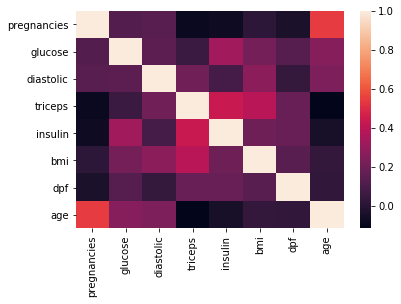

In [5]:
# mapa de calor
sns.heatmap(diabetes.iloc[:,:-1].corr())

In [8]:
X_train=diabetes.iloc[:,:-1]
y_train=diabetes.iloc[:,-1]
print("shape X: ", X_train.shape)
# Reshape vector y_train
y_train=y_train.values.reshape(768,1)
print("Shape y: ,", y_train.shape)

m=X_train.shape[0]
print("Numero de ejemplos = ", m)


shape X:  (768, 8)
Shape y: , (768, 1)
Numero de ejemplos =  768


In [9]:
X_train.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0            6      148         72       35        0  33.6  0.627   50
1            1       85         66       29        0  26.6  0.351   31
2            8      183         64        0        0  23.3  0.672   32
3            1       89         66       23       94  28.1  0.167   21
4            0      137         40       35      168  43.1  2.288   33

### Normalizacion
Aqui normalizamos para evitar valores Nans y acelerar el algoritmo ademas de acerlo mas preciso

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() # normalizar o estandarizar
scaler.fit(X_train) #  aplicar la transfoirmacion o la normalizacion
x_train=scaler.transform(X_train)  # puden utilizar en un soklo paso .fit_transform

# convertir a Dataframe 
x_train=pd.DataFrame(x_train,columns=X_train.columns)
x_train.head()


pregnancies   glucose  diastolic   triceps   insulin       bmi       dpf  \
0     0.639947  0.848324   0.149641  0.907270 -0.692891  0.204013  0.468492   
1    -0.844885 -1.123396  -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2     1.233880  1.943724  -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3    -0.844885 -0.998208  -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4    -1.141852  0.504055  -1.504687  0.907270  0.765836  1.409746  5.484909   

        age  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496

In [11]:
x_train.shape

(768, 8)

### Funcion de activacion --> sigmoide
Recordemos que la funcion de activacion sirve para que el algoritmo pueda apreder funciones no lineales.


In [12]:
def sigmoid(Z):
    """Funcion de activacion sigmoide
        Aprender no linealidades
        Arg:
        Z = WX+b 
        Return:
        y= g(WX +b) Perceptron o unidad basica de red neuronal 
        Valores entre  0|1
    """
    return 1.0/(1.0 + np.exp(-Z))
  

In [19]:
# los valores positivos los aproximara a 1 y los negativos a cero 
sigmoid(-151515)

0.0

### inicializar valores 
Se recomienda que sean random pero si es una tarea de regression se  pueden ijnizializar con ceros.



In [42]:
def inicializar_valor(X):
  # Tu codigo
  
    w=np.random.rand(X.shape[1],1)  # [Numero de Caracteristicas, 1 ]
    b=np.random.rand(1,1)    
  
    return w,b

In [43]:
w,b=inicializar_valor(x_train)
print('w',w.shape)
print('b:',b.shape)


w (8, 1)
b: (1, 1)


### Loss function


**Crea la funcion**: Categorical cross-entropy cost 
$$J=-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(Ypred\right) + (1-y^{(i)})\log\left(1- Ypred\right)) \tag{7}$$


In [25]:
def loss_fn(X,y,W,b):
  
    m=X.shape[0] # numero de ejemplos 
    z=X @ W + b # Trasformacion lineal  
    a=sigmoid(z) # funcion de activacion  a === Ypred
     
    # Funcion de error vectorizada 
    loss=-(y.T @ np.log(a) - (1-y).T @ np.log(1-a))/m
  
    return loss

### Foward propagation

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

In [57]:
def forward_prop(X,y,W,b):
   """ Arg:
   X: Datos de entranamiento
   y: clases o categorias a predecir
   Parametros
   W : weights
   b: bias

   Return:
   Modelo o ypred
   """
   # modelo
   z=X @ W + b
   A=sigmoid(z)
  
   return A 
  

### Backward propagation
$$ \frac{\partial J}{\partial z} = (A-Y)\tag{6}$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$



In [52]:
def backward(X,Y,A):
  """ Arg:
  X: datos de entrenamiento
  Y: clases
  A : modelo 
  """
    
  #numero de ejemplos
  m=X.shape[0]
  
  # Derivatives o vectores de correcccion o gradientes 
  dz= A-Y
  dw=(X.T @ dz)/m
  db=np.sum(A-Y)/m
  # Vectores de correccion para el algoritmo de optimizacion 
  gradientes={'dw':dw,'db':db}

  return gradientes

In [58]:
# Si trabajas con Dataframes asegurate de utilizar .values para tener tu array de valores
A=forward_prop(x_train.values,y_train,w,b)
bp=backward(x_train.values,y_train,A)
bp

{'db': 0.1577652162837603, 'dw': array([[ 0.00743325],
        [-0.07277883],
        [ 0.06650726],
        [ 0.08565651],
        [ 0.08670006],
        [ 0.01555331],
        [ 0.08018413],
        [-0.01227596]])}

### Gradiente Descendiente

In [65]:
def gradient_descent(X,Y,gradients,num_iter,learning_rate=0.01):
  
  # inicializas parmetros
  W,b=inicializar_valor(X)
  # Forward propagation
  A=forward_prop(X,Y,W,b)
  
  # Gradientes o vectores de correccion
  dw=gradients['dw']
  db=gradients['db']
  
  
  for i in range(num_iter):
    # update rule 
    W=W - learning_rate*dw
    b=b - learning_rate*db
        
    
  parametros={'W':W,'b':b}
  gradientes={'dw':dw,'db':db}
  
  return parametros,gradientes
  
  

### Modelo final


In [66]:
def modelo_rnn(X_train,y_train,num_iter,learning_rate=0.01):
  
  # Inicializar valores
  W,b=inicializar_valor(X_train)
  
  # Foward propagation
  A=forward_prop(X_train,y_train,W,b)
  
  # Backpropagation
  grad=backward(X_train,y_train,A)
  
  # Gradient Descent o algoritmo de Optimizacion
  parametros,gradientes=gradient_descent(X_train,y_train,grad,num_iter,learning_rate)
  
  return parametros,gradientes
  

In [67]:
parametros,gradientes =modelo_rnn(x_train.values,y_train,10000,learning_rate=0.02)

### Predecir

In [86]:
def predict(final_pred):
    y_pred = np.zeros((final_pred.shape[0],1))
    for i in range(final_pred.shape[1]):
        if final_pred[i][0] > 0.5:
            y_pred[i][0] = 1
    return y_pred

In [88]:
from sklearn.metrics import accuracy_score
y_pred= predict(x_train.values @ parametros['W'] + parametros['b'])


print('y_train shape:',y_train.shape)
print('y_pred shape: ',y_pred.shape)
exactitud=accuracy_score(y_train,y_pred)

print("Exactitud: ",exactitud)

y_train shape: (768, 1)
y_pred shape:  (768, 1)
Exactitud:  0.6510416666666666


## Forward propagation

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$
 
##  Backward prop 
$$ \frac{\partial J}{\partial z} = (A-Y)\tag{6}$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$


In [69]:
class Perceptron(object):
    
    # Estructura y parametros de la red
    def __init__(self,lr=0.01, n_iter=1000):
            """Arg:
            lr: learning rate
            n_iter: numero de iteraciones
            """
            self.lr=lr
            self.n_iter=n_iter
            
            
    # Gradiente Descendiente
    def fit(self,X, y):
        """Arg:
        X: datos de entrenamiento array  de la forma :[numero de ejemplos,n_caracteristicas] 
        y:clases o categorias array forma [numero de ejemplos,1]
        
        """
        # Iniciualizar parametros Random
        self.w = np.random.rand(X.shape[1],1)  # [Numero de Caracteristicas, 1 ]
        self.b = np.random.rand(1,1) 
        self.error=[]
        
        for i in range(self.n_iter):
            # Transformacion lineal
            Z=self.Linear(X)
            # Aprende no linealidades
            y_pred=self.activacion(Z)
            
            # Calcular gradientes con backward propagation
            gradientes= self.backward(X, y, y_pred)
             
            # Update rule
            self.w += -self.lr*gradientes['dw'] # weightes
            self.b += -self.lr*gradientes['db'] # bias
            
            # Error o Loos function o Cost
            self.error.append(self.Error(y_pred,y))
            print(f'Error: {self.error[i%100]}')
            
    # Forward propagation    
    def Linear(self,X):
        """ Transformacion lineal  y= WX + b """
        Z=  X @ self.w + self.b
        return Z
    
    def backward(self,X,Y,A):
      """ Arg:
      X: datos de entrenamiento
      Y: clases
      A : modelo 
      """

      #numero de ejemplos
      m=X.shape[0]

      # Derivatives o vectores de correcccion o gradientes 
      dz= A-Y
      dw=(X.T @ dz)/m
      db=np.sum(dz)/m
    
      # Vectores de correccion para el algoritmo de optimizacion 
      gradientes={'dw':dw,'db':db}

      return gradientes

    def activacion(self,Z):
        """Funcionb de activacion sigmoide"""

        return 1.0/(1.0 + np.exp(-Z))
    
    def Error(self, A, y):
        
        m=y.shape[0] # numero de ejemplos
        
        # Categorical Cross entropy loss
        error= -( y.T @ np.log(A) + (1-y).T @ np.log(1-A))/m
        
        return error
    
    def predict(self, X):
        """prediccion """
        # Si ypred es mayor a 0 ponlo a 1 sino a 0
        ypred=np.where(self.Linear(X)>=0,1,0)
        return ypred 


In [70]:
modelo = Perceptron(lr=1, n_iter=1500)

In [71]:
modelo.fit(x_train.values, y_train)

Error: [[0.66858868]]
Error: [[0.60227803]]
Error: [[0.55937319]]
Error: [[0.53156735]]
Error: [[0.51337454]]
Error: [[0.50128281]]
Error: [[0.49308842]]
Error: [[0.48741864]]
Error: [[0.4834144]]
Error: [[0.48053109]]
Error: [[0.47841735]]
Error: [[0.47684214]]
Error: [[0.4756506]]
Error: [[0.47473697]]
Error: [[0.47402779]]
Error: [[0.47347115]]
Error: [[0.47302985]]
Error: [[0.47267681]]
Error: [[0.47239206]]
Error: [[0.47216071]]
Error: [[0.47197151]]
Error: [[0.47181586]]
Error: [[0.47168714]]
Error: [[0.47158019]]
Error: [[0.47149094]]
Error: [[0.4714162]]
Error: [[0.47135338]]
Error: [[0.47130043]]
Error: [[0.47125568]]
Error: [[0.47121777]]
Error: [[0.47118558]]
Error: [[0.47115819]]
Error: [[0.47113485]]
Error: [[0.47111493]]
Error: [[0.4710979]]
Error: [[0.47108333]]
Error: [[0.47107084]]
Error: [[0.47106013]]
Error: [[0.47105093]]
Error: [[0.47104302]]
Error: [[0.47103622]]
Error: [[0.47103036]]
Error: [[0.47102532]]
Error: [[0.47102097]]
Error: [[0.47101722]]
Error: [[0.471

In [72]:
from sklearn.metrics import accuracy_score

y_pred= modelo.predict(x_train.values)


print('y_train shape:',y_train.shape)
print('y_pred shape: ',y_pred.shape)
exactitud=accuracy_score(y_train,y_pred)

print("Exactitud de entrenamiento: ",exactitud)


y_train shape: (768, 1)
y_pred shape:  (768, 1)
Exactitud:  0.7825520833333334
